In [3]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [4]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"../../clening_data/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [5]:
df.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | My wife and I are very disappo...,5.0,2024-09-13,United States,False,verified wife disappointed flying british airw...
1,Not Verified | We flew BA between Heathrow an...,1.0,2024-09-13,Australia,False,verified flew ba heathrow berlin one way conne...
2,Not Verified | Absolutely disgusted with BA. ...,8.0,2024-09-13,United Kingdom,False,verified absolutely disgusted ba flight cancel...
3,Not Verified | Took a trip to Nashville with m...,1.0,2024-09-11,United Kingdom,False,verified took trip nashville wife leisure brea...
4,Not Verified | A nightmare journey courtesy o...,8.0,2024-09-08,United Kingdom,False,verified nightmare journey courtesy british ai...


In [6]:
#What is the average overall rating given for British Airways?
print('avg rating' , df.stars.mean())

avg rating 4.6852620653866115


Text(0.5, 0.98, 'Counts for each ratings')

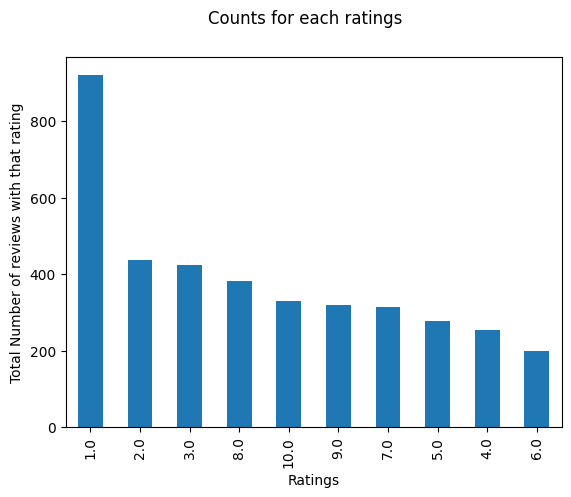

In [7]:
# What is the total counts for each ratings?
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [9]:
# Get the value counts and convert to DataFrame
df_ratings = df.stars.value_counts().reset_index()
df_ratings.columns = ['stars', 'count']  # Rename the columns

# Calculate percentage values
pct_values = (df_ratings['count'] / df_ratings['count'].sum() * 100).tolist()
pct_values = [round(x, 2) for x in pct_values]

# Add percentage values to the DataFrame
df_ratings['pct_values'] = pct_values

# Display the DataFrame
print(df_ratings)


   stars  count  pct_values
0    1.0    921       23.90
1    2.0    438       11.36
2    3.0    425       11.03
3    8.0    381        9.89
4   10.0    330        8.56
5    9.0    318        8.25
6    7.0    313        8.12
7    5.0    276        7.16
8    4.0    254        6.59
9    6.0    198        5.14


In [10]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [11]:
# renaming columns
#df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)
df_ratings = df['stars'].value_counts().reset_index().rename(columns={'index': 'Stars', 'stars': 'total_counts'})


In [12]:
df_ratings

,total_counts,count
0,1.0,921
1,2.0,438
2,3.0,425
3,8.0,381
4,10.0,330
5,9.0,318
6,7.0,313
7,5.0,276
8,4.0,254
9,6.0,198


In [16]:
# Get the value counts and convert to DataFrame
df_ratings = df.stars.value_counts().reset_index()
df_ratings.columns = ['stars', 'count']  # Rename the columns

# Calculate total counts if needed (optional)
df_ratings['total_counts'] = df_ratings['count']

# Calculate percentage values
pct_values = (df_ratings['count'] / df_ratings['count'].sum() * 100).tolist()
pct_values = [round(x, 2) for x in pct_values]

# Add percentage values to the DataFrame
df_ratings['pct_values'] = pct_values

# Display the DataFrame
print(df_ratings)


   stars  count  total_counts  pct_values
0    1.0    921           921       23.90
1    2.0    438           438       11.36
2    3.0    425           425       11.03
3    8.0    381           381        9.89
4   10.0    330           330        8.56
5    9.0    318           318        8.25
6    7.0    313           313        8.12
7    5.0    276           276        7.16
8    4.0    254           254        6.59
9    6.0    198           198        5.14


In [17]:
print(df_ratings.columns)


Index(['stars', 'count', 'total_counts', 'pct_values'], dtype='object')


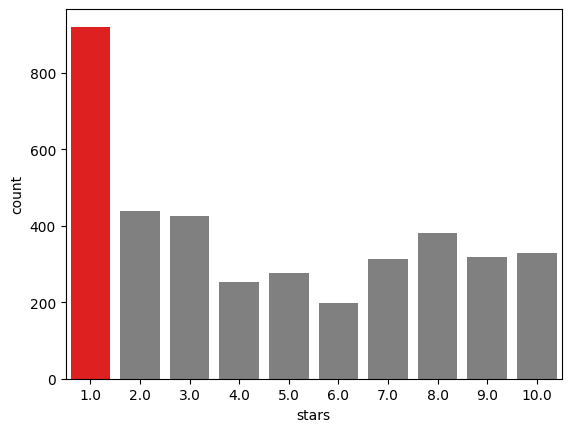

Text(0.5, 1.0, 'Counts for each ratings')

In [22]:
# Create a new column to define colors based on counts
df_ratings['color'] = ['Red' if x == max(df_ratings['count']) else 'grey' for x in df_ratings['count']]

# Create the barplot
ax = sns.barplot(x='stars', y='count', data=df_ratings, hue='color', dodge=False, palette={'Red': 'red', 'grey': 'grey'}, err_kws={'linewidth': 0})

# Remove the legend since it's not needed
ax.legend_.remove()

# Display the plot
plt.show()





ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")


In [23]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

73 unique countries


In [30]:
# Example: Assuming df has 'country' and 'reviews' columns
df_country_review = df.groupby('country').agg(total_reviews=('reviews', 'count')).reset_index()
df_country_review.rename(columns={'country': 'country', 'total_reviews': 'total_reviews'}, inplace=True)


In [32]:
print(df_country_review.columns)


Index(['country', 'total_reviews'], dtype='object')


In [33]:
#df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

In [34]:
print(df_country_review.columns)

Index(['country', 'total_reviews'], dtype='object')


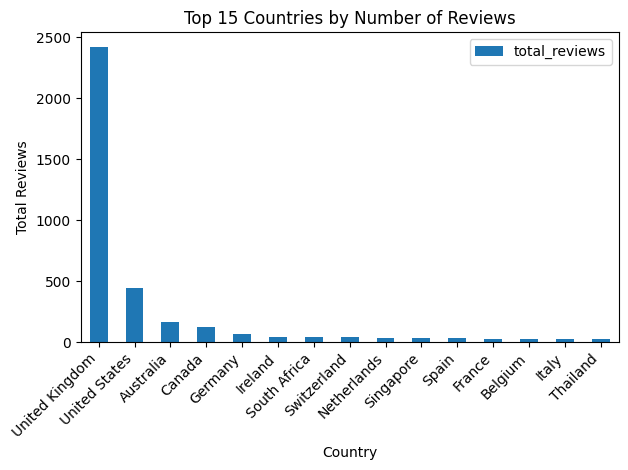

In [39]:
# Show top 15 countries
top_countries = df_country_review.nlargest(15, 'total_reviews')

top_countries.plot(kind="bar", x='country', y='total_reviews')
plt.title("Top 15 Countries by Number of Reviews")
plt.xlabel("Country")
plt.ylabel("Total Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [41]:
print(df.dtypes)


reviews      object
stars       float64
date         object
country      object
verified       bool
corpus       object
dtype: object


In [42]:
print(df['stars'].isnull().sum())  # Check for NaN values
print(np.isinf(df['stars']).sum())  # Check for infinite values


5
0


In [43]:
df = df.dropna(subset=['stars'])
df = df[~np.isinf(df['stars'])]  # Remove infinite values


In [44]:
#Which country provided on average highest ratings?
df_country_rating = pd.DataFrame(df.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()


In [45]:
print(df_country_rating)


               country      stars
0   Dominican Republic  10.000000
1           Costa Rica   9.000000
2              Ecuador   9.000000
3                Chile   9.000000
4             Slovakia   7.333333
..                 ...        ...
68           Indonesia   1.000000
69              Jordan   1.000000
70              Panama   1.000000
71             Senegal   1.000000
72             Vietnam   1.000000

[73 rows x 2 columns]


In [46]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)
print(df.groupby('country')['stars'].apply(lambda x: x.dtype))  # Check data types in each group


country
Argentina               float64
Australia               float64
Austria                 float64
Bahrain                 float64
Barbados                float64
                         ...   
Ukraine                 float64
United Arab Emirates    float64
United Kingdom          float64
United States           float64
Vietnam                 float64
Name: stars, Length: 73, dtype: object


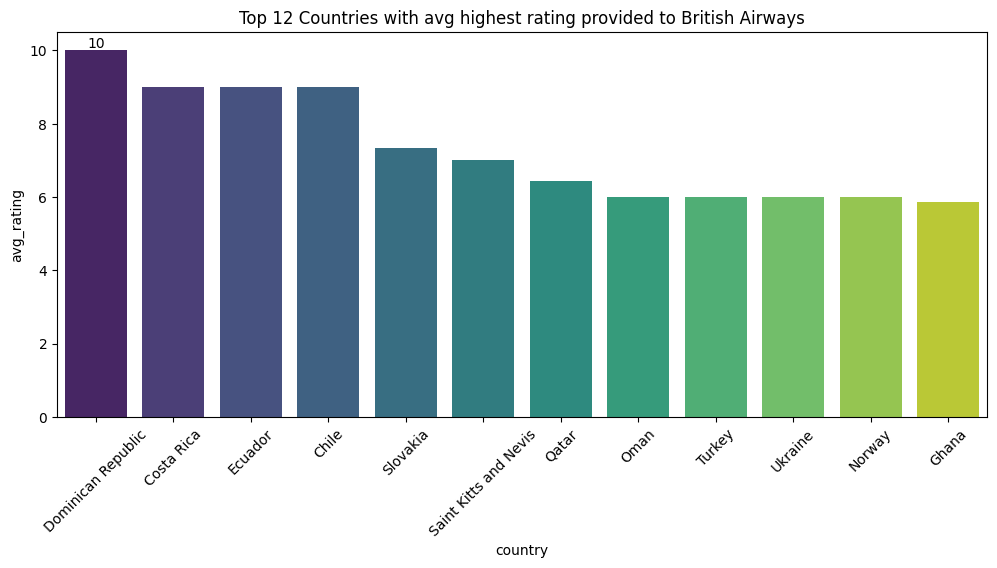

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_country_rating has a column 'avg_rating' and 'country'
fig, ax = plt.subplots(figsize=(12,5))

# Use `hue` with `x='country'` and disable the legend
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12], hue='country', palette='viridis', legend=False)

# Adding labels to the bars
ax1.bar_label(ax1.containers[0])

# Rotate the country names by 45 degrees
plt.xticks(rotation=45)

# Setting the title of the plot
ax1.set_title("Top 12 Countries with avg highest rating provided to British Airways")

# Show the plot
plt.show()



In [48]:
Time Series Analysis
convert the date datatype to datetime



In [88]:
import plotly.express as px

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create the time series line plot
fig = px.line(df, x='date', y='stars')

# Add a range slider to the x-axis
fig.update_xaxes(rangeslider_visible=True)

# Show the plot
fig.show()


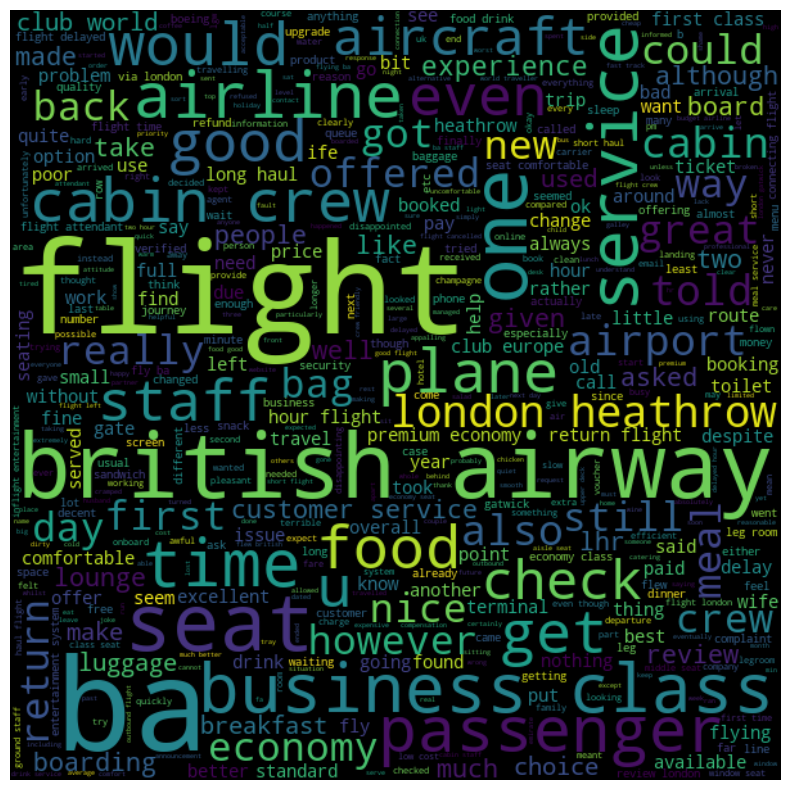

In [50]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.


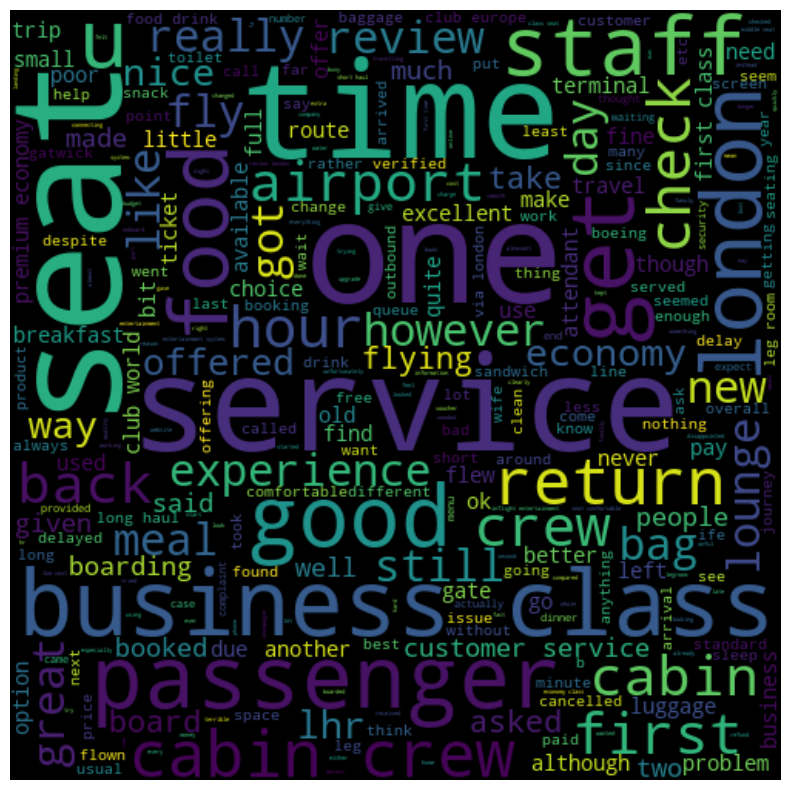

In [51]:

import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Frequency

In [52]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

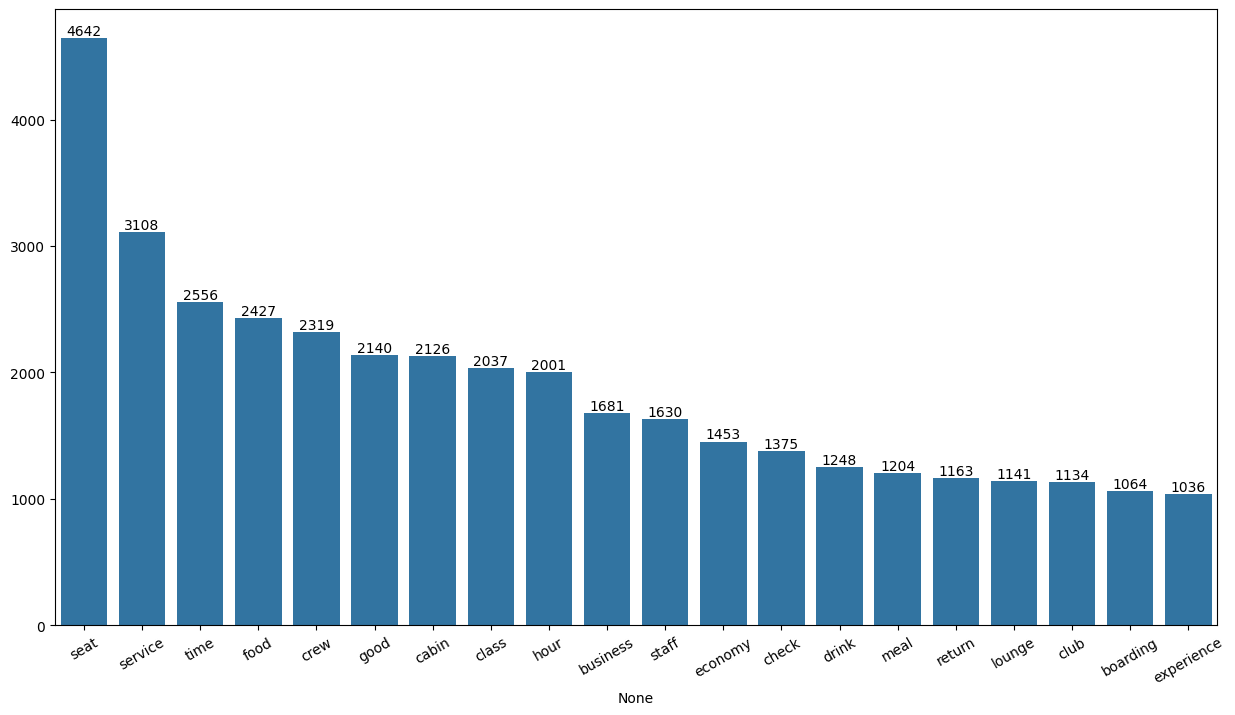

In [53]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service" and "food" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience.
-------------------------------------------------------------------------------------------------------------------------------
Word Frequency with N-gram

<Axes: >

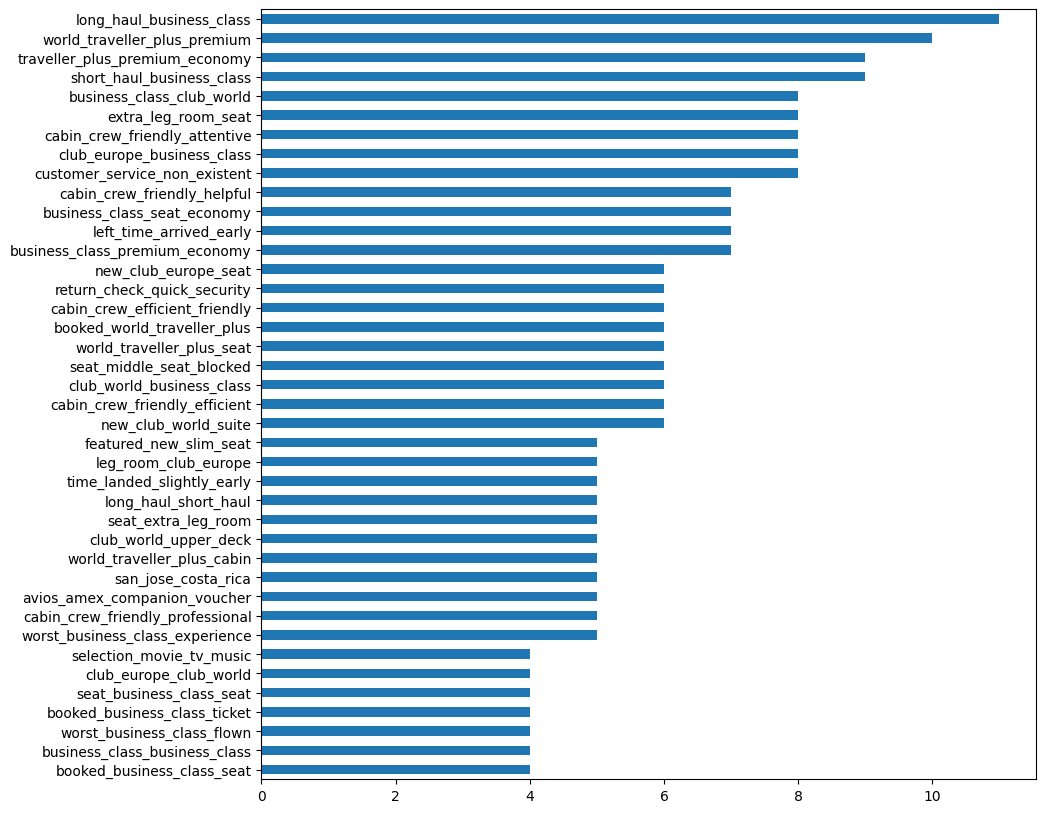

In [63]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [55]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

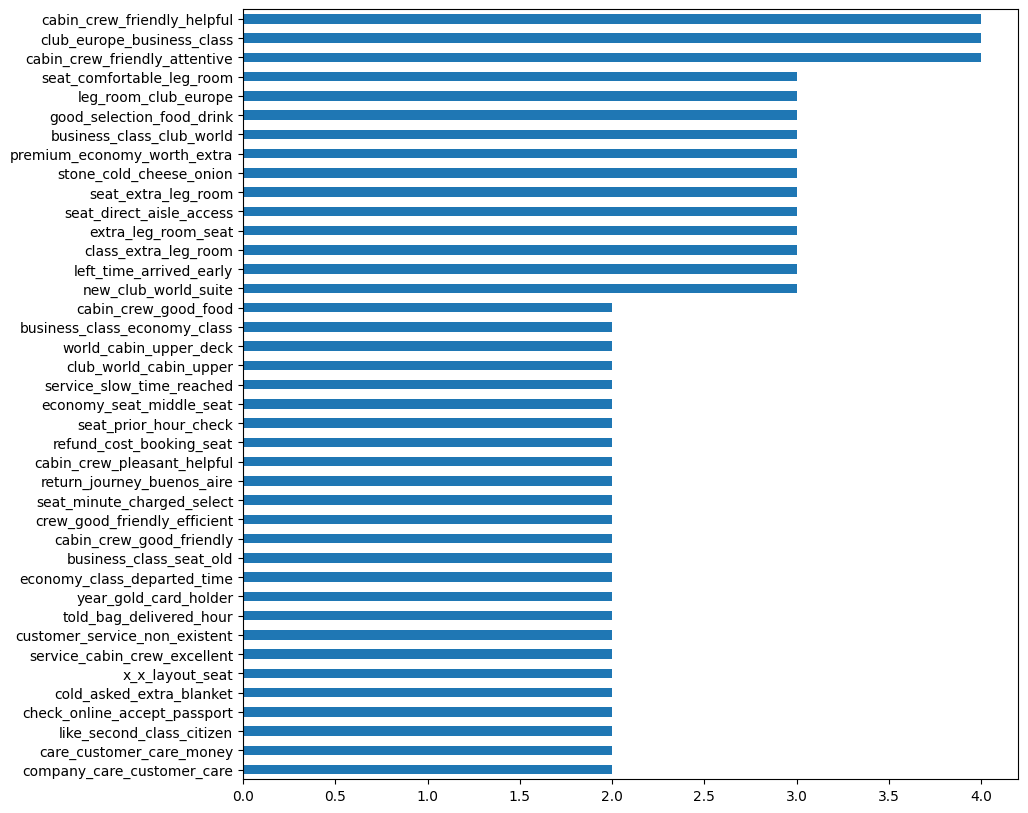

In [56]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

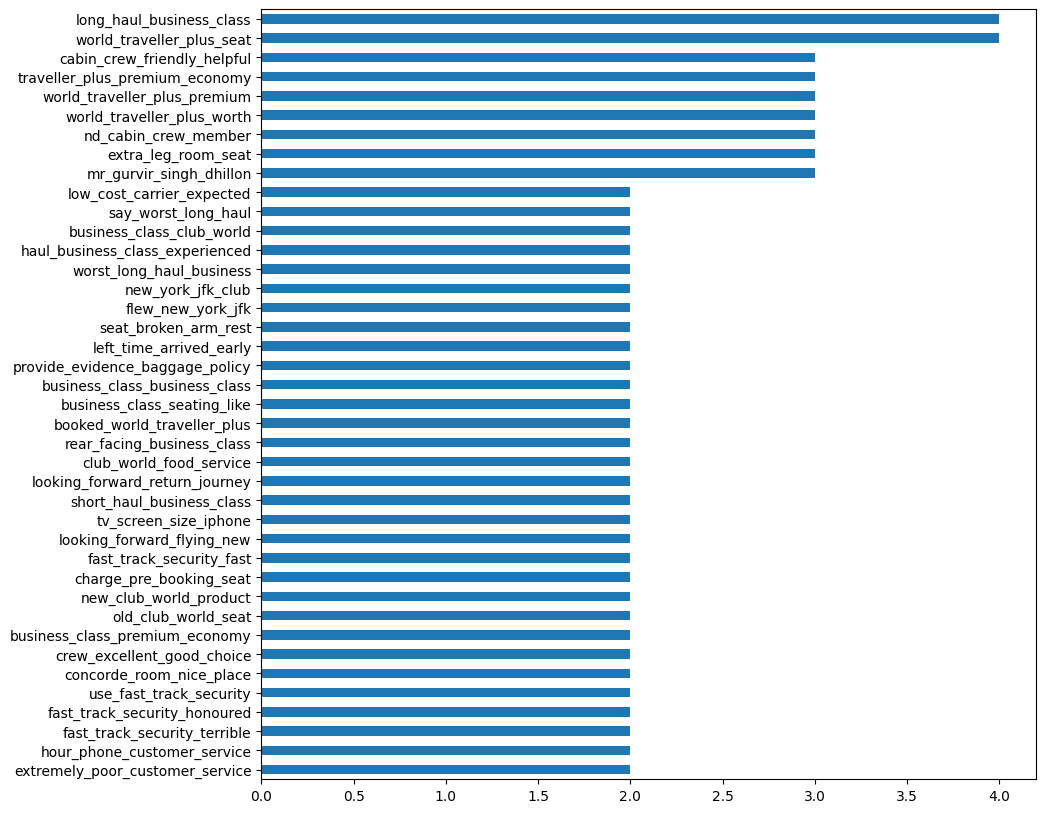

In [57]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

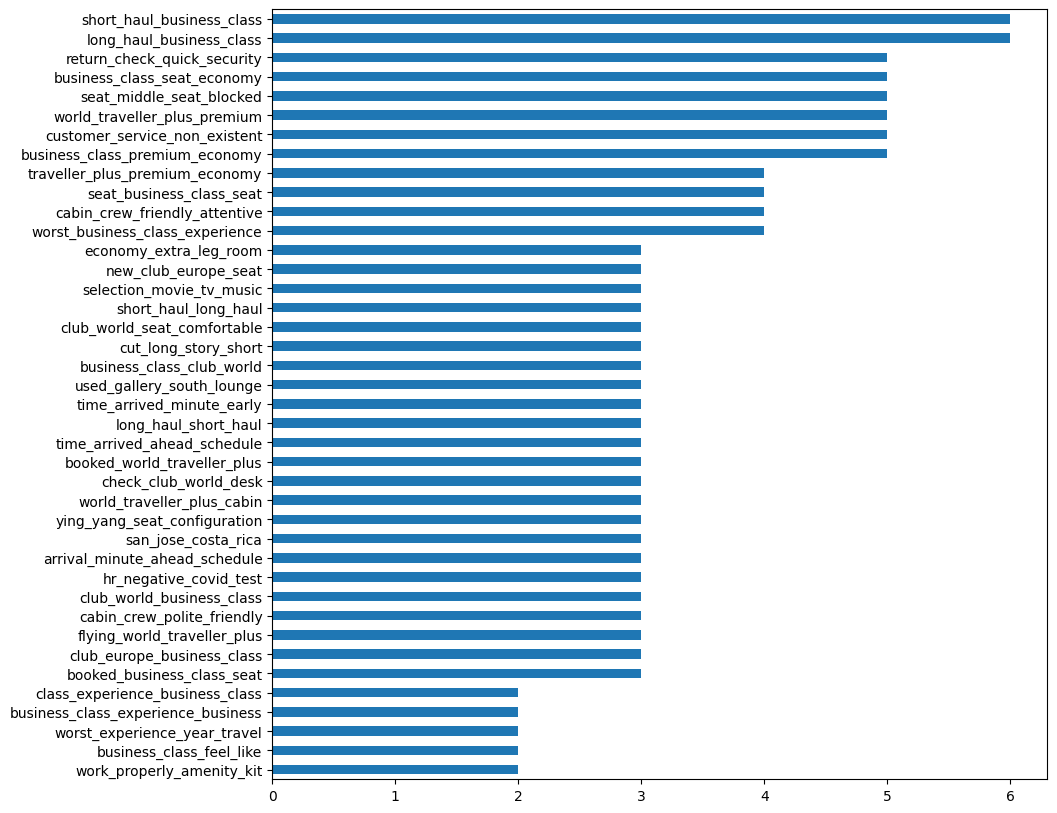

In [58]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [66]:
from textblob import TextBlob

# Set a column 'polarity' with all 0.0 (float) values initially
df['polarity'] = 0.0

# Iterate through the corpus column to calculate polarity
for i in range(len(df)):
    sent = TextBlob(df.iloc[i]['corpus'])  # Use .iloc[i] to access row by index
    polarity = sent.sentiment.polarity
    df.at[i, 'polarity'] = polarity  # Use .at[] to set value safely



In [67]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2628 number of reviews between -0.2 and 0.2 polarity score
1534 number of reviews between -0.1 and 0.1 polarity score


In [89]:
# We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np


# Initialize the VADER sentiment analyzer
vds = SentimentIntensityAnalyzer()

# Initialize a 'label' column with zeros
df['label'] = 0

# Loop through each review in the corpus and calculate sentiment score
for i in range(len(df)):
    # Convert the text to a string, handle missing values
    corpus_text = str(df.iloc[i]['corpus']) if pd.notna(df.iloc[i]['corpus']) else ""
    
    # Get the sentiment score
    score = vds.polarity_scores(corpus_text)['compound']
    
    # Assign the label based on the score
    if score > 0.2:
        df.at[i, 'label'] = 1  # Positive sentiment
    elif score < 0:
        df.at[i, 'label'] = -1  # Negative sentiment
    else:
        df.at[i, 'label'] = 0  # Neutral sentiment



In [90]:

df.label.value_counts()

label
 1    2451
-1    1275
 0     133
Name: count, dtype: int64


---------------------------------------------------------
|| Topic Modeling with LDA
We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.
-----------------------------------------------------------

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Fill missing values in the 'corpus' column with an empty string and reassign to the original column
df['corpus'] = df['corpus'].fillna('')

# Create an object of CountVectorizer
vect = CountVectorizer()

# Apply transformation
tf = vect.fit_transform(df['corpus']).toarray()

# Get feature names
tf_feature_names = vect.get_feature_names_out()

# Check the result
print(tf)
print(tf_feature_names)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['aa' 'ab' 'aback' ... 'zurich' 'zusammenschluss' 'zzza']


In [93]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [76]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,mexico,10.3,asked,48.1,flight,1626.4,ba,609.8,flight,1812.1,flight,2093.4,seat,2381.2,seat,635.3
1,mr,9.8,drink,47.0,ba,1187.8,flight,495.0,hour,692.0,good,1499.8,flight,2213.8,ba,196.0
2,prawn,8.2,staff,44.7,told,621.3,service,452.3,airway,470.0,seat,1079.9,ba,2048.9,economy,172.2
3,spinach,6.1,flight,42.2,customer,601.1,airline,281.0,british,468.8,crew,1015.3,class,1531.8,premium,120.2
4,salmon,6.0,tea,35.0,day,530.9,plane,270.9,london,412.3,time,910.9,food,1298.7,london,101.3
5,veg,5.2,service,32.7,airway,508.4,passenger,270.2,heathrow,354.4,ba,878.7,business,1256.0,british,88.0
6,friend,5.1,crew,32.2,british,507.4,boarding,221.9,ba,354.2,food,839.2,cabin,1134.1,airway,87.2
7,nassau,5.1,lcy,31.6,would,501.0,cabin,220.3,delayed,318.2,lounge,825.5,service,1084.0,row,86.4
8,sathies,5.1,abu,26.4,service,498.5,time,219.7,delay,296.9,service,791.8,crew,1004.6,extra,77.6
9,thai,4.5,dhabi,26.4,get,470.3,london,218.7,time,274.6,cabin,722.2,airline,959.7,leg,74.3


In [94]:

##Topic modeling with NMF
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.01340831, 0.04095875],
       [0.04123514, 0.13758889],
       [0.        , 0.16892442],
       ...,
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [95]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [79]:


df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,seat,23.1,flight,24.2
1,ba,13.1,ba,8.1
2,class,10.3,hour,5.5
3,food,8.2,time,4.6
4,business,8.2,london,4.0
5,service,8.0,airway,3.8
6,cabin,7.7,british,3.8
7,crew,7.3,service,3.8
8,good,7.2,would,3.3
9,economy,6.1,day,2.9
